# Plotting Practice

## I thought it would be interesting to plot some data on violence among inmates in NYC, so I pulled two data sets from NYC Open Data. The first has inmate population from 2001 to 2010, and the second has inmate stabbing/slashing incidents from the same time frame. I merged these datasets then formed a scatterplot of the two variables (population vs. incidents) to see their relationship visually.

In [1]:
import os
import sys
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp

#to revert to matplotlib <2.0 options
import matplotlib as mpl
mpl.style.use('classic')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
inm = pd.read_csv('https://data.cityofnewyork.us/api/views/26ze-s5bx/rows.csv')
inm.head()

,Fiscal year,Inmate Population
0,2010,13049
1,2009,13362
2,2008,13850
3,2007,13987
4,2006,13497


In [3]:
inc = pd.read_csv('https://data.cityofnewyork.us/api/views/hve5-8z68/rows.csv')
inc.head()

,Fiscal Year,Number of Incidents
0,2010.0,34.0
1,2009.0,21.0
2,2008.0,19.0
3,2007.0,37.0
4,2006.0,37.0


In [4]:
inm['year'] = [2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001]
inm

,Fiscal year,Inmate Population,year
0,2010,13049,2010
1,2009,13362,2009
2,2008,13850,2008
3,2007,13987,2007
4,2006,13497,2006
5,2005,13576,2005
6,2004,13751,2004
7,2003,14533,2003
8,2002,13934,2002
9,2001,14490,2001


In [5]:
inc['year'] = [2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, NaN]
inc

,Fiscal Year,Number of Incidents,year
0,2010.0,34.0,2010.0
1,2009.0,21.0,2009.0
2,2008.0,19.0,2008.0
3,2007.0,37.0,2007.0
4,2006.0,37.0,2006.0
5,2005.0,30.0,2005.0
6,2004.0,40.0,2004.0
7,2003.0,40.0,2003.0
8,2002.0,29.0,2002.0
9,2001.0,54.0,2001.0


In [6]:
new = pd.merge(inm, inc, on='year')

In [7]:
new

,Fiscal year,Inmate Population,year,Fiscal Year,Number of Incidents
0,2010,13049,2010,2010.0,34.0
1,2009,13362,2009,2009.0,21.0
2,2008,13850,2008,2008.0,19.0
3,2007,13987,2007,2007.0,37.0
4,2006,13497,2006,2006.0,37.0
5,2005,13576,2005,2005.0,30.0
6,2004,13751,2004,2004.0,40.0
7,2003,14533,2003,2003.0,40.0
8,2002,13934,2002,2002.0,29.0
9,2001,14490,2001,2001.0,54.0


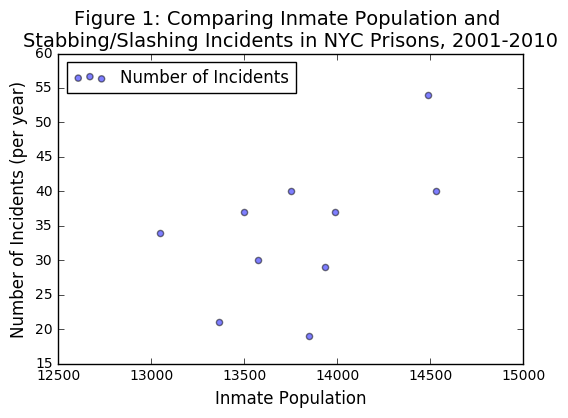

In [8]:
x = new['Inmate Population']
y = new['Number of Incidents']

pl.scatter(x, y, alpha = 0.5)
pl.title('Figure 1: Comparing Inmate Population and \nStabbing/Slashing Incidents in NYC Prisons, 2001-2010', fontsize=14)
pl.xlabel('Inmate Population', fontsize=12)
pl.ylabel('Number of Incidents (per year)', fontsize=12)
pl.legend(loc = 'upper left')

### Figure 1: This scatterplot graphs inmate population against the number of stabbing and slashing incidents that occured among inmates from 2001 to 2010. A quick look suggests there could be a positive correlation between population and incidents.

## Add a best fit line

Source: https://www.wired.com/2011/01/linear-regression-with-pylab/

In [9]:
(m, b) = polyfit(x, y, 1)
print(m)

0.0115406557845


In [10]:
print(b)

-125.194517728


In [11]:
yp = polyval([m,b],x)

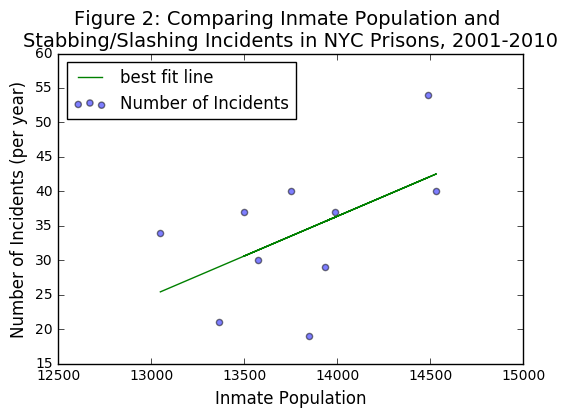

In [12]:
pl.scatter(x, y, alpha = 0.5)
pl.plot(x, yp, label = "best fit line", color = 'green')
pl.title('Figure 2: Comparing Inmate Population and \nStabbing/Slashing Incidents in NYC Prisons, 2001-2010', fontsize=14)
pl.xlabel('Inmate Population', fontsize=12)
pl.ylabel('Number of Incidents (per year)', fontsize=12)
pl.legend(loc = 'upper left')

### Figure 2: Here I've added a line of best fit to the previous plot. This confirms the positive correlative relationship guessed from the raw plot, thought the data do not fit along the line itself too closely. (See further comments below).

# Comments:

## This raw visual data suggests a positive correlative relationship between inmate population and number of incidents from 2001 to 2010; however, it is important to note the differences in the x and y values on each axis. The population is quite large compared to the number of incidents, so it is possible the increase in incidents is negligible in actuality. Performing a statistical test on this data would give a better confirmation of its statistical significance.